In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [31]:
import pandas as pd
df = pd.read_csv(r"C:\Users\avbra\Downloads\loan_data.csv")  # Use raw string
print(df.head())  # Display first few rows


    Loan_ID Gender Married  ApplicantIncome  LoanAmount Loan_Status
0  LP001002   Male      No             5849         NaN           Y
1  LP001003   Male     Yes             4583       128.0           N
2  LP001005   Male     Yes             3000        66.0           Y
3  LP001006   Male     Yes             2583       120.0           Y
4  LP001008   Male      No             6000       141.0           Y


In [33]:
obj = (df.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))


Categorical variables: 4


In [35]:
# Dropping Loan_ID column
df.drop(['Loan_ID'],axis=1,inplace=True)


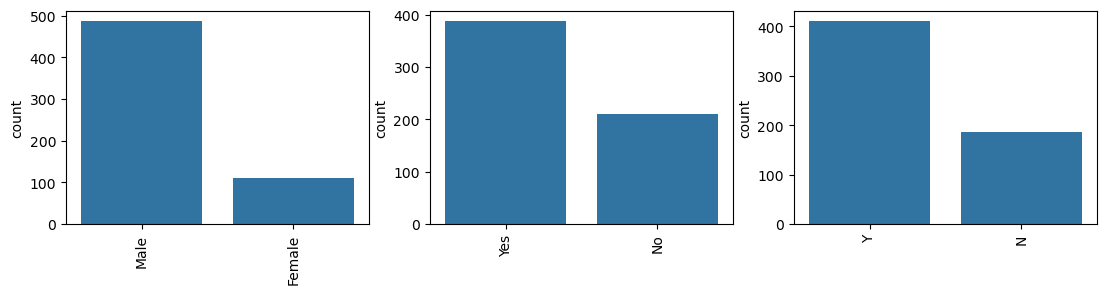

In [39]:
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
plt.figure(figsize=(18,36))
index = 1

for col in object_cols:
  y = df[col].value_counts()
  plt.subplot(11,4,index)
  plt.xticks(rotation=90)
  sns.barplot(x=list(y.index), y=y)
  index +=1 


In [41]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how 
# to understand word labels.
label_encoder = preprocessing.LabelEncoder()
obj = (df.dtypes == 'object')
for col in list(obj[obj].index):
  df[col] = label_encoder.fit_transform(df[col])


In [43]:
# To find the number of columns with 
# datatype==object
obj = (df.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))


Categorical variables: 0


<Axes: >

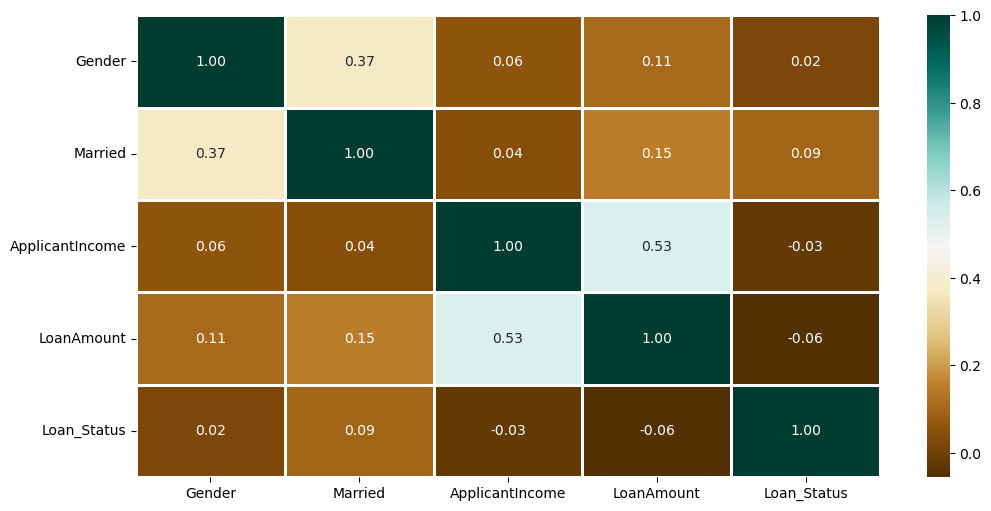

In [45]:
plt.figure(figsize=(12,6))

sns.heatmap(df.corr(),cmap='BrBG',fmt='.2f',
            linewidths=2,annot=True)


Index(['Loan_ID', 'Gender', 'Married', 'ApplicantIncome', 'LoanAmount',
       'Loan_Status'],
      dtype='object')


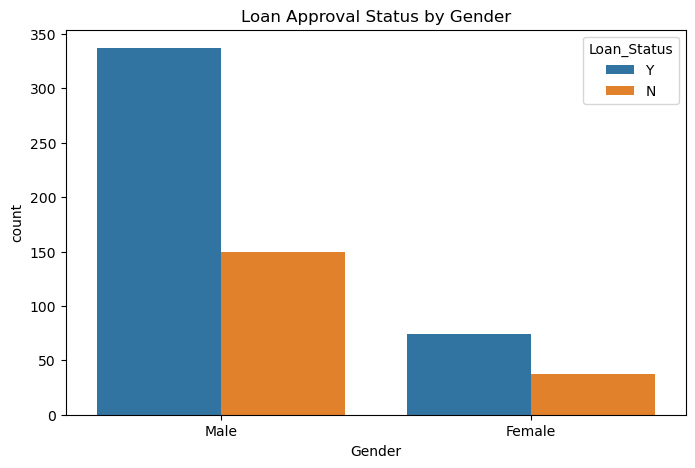

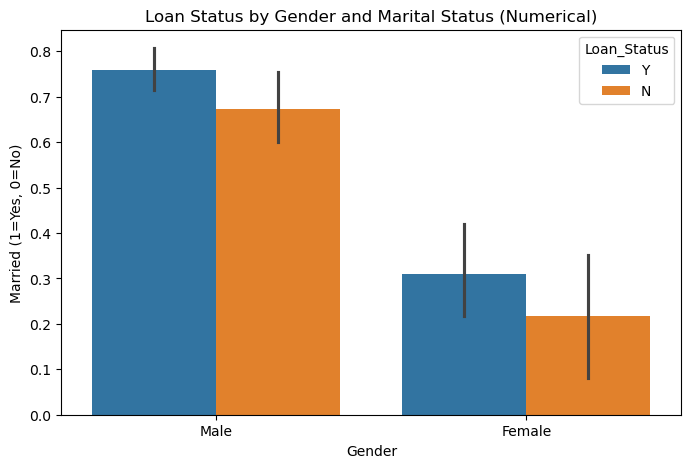

In [65]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r"C:\Users\avbra\Downloads\loan_data.csv")

# Ensure columns exist
print(df.columns)  # Debugging step to check column names

# Fix: Use countplot for categorical visualization
plt.figure(figsize=(8, 5))
sns.countplot(x="Gender", hue="Loan_Status", data=df)
plt.title("Loan Approval Status by Gender")
plt.show()

# Alternative: Use barplot with grouping
plt.figure(figsize=(8, 5))
sns.barplot(x="Gender", y=df["Married"].apply(lambda x: 1 if x == "Yes" else 0), hue="Loan_Status", data=df)
plt.title("Loan Status by Gender and Marital Status (Numerical)")
plt.ylabel("Married (1=Yes, 0=No)")
plt.show()



In [55]:
import pandas as pd

# Select only numeric columns to fill NaN values with their mean
for col in df.select_dtypes(include=['number']).columns:
    df[col] = df[col].fillna(df[col].mean()) 

# Check if NaN values are still present
print(df.isna().sum())



Loan_ID            0
Gender             0
Married            0
ApplicantIncome    0
LoanAmount         0
Loan_Status        0
dtype: int64


In [57]:
from sklearn.model_selection import train_test_split

X = df.drop(['Loan_Status'],axis=1)
Y = df['Loan_Status']
X.shape,Y.shape

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.4,
                                                    random_state=1)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape


((358, 5), (240, 5), (358,), (240,))

In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Step 1: Load the dataset
df = pd.read_csv("loan_data.csv")

# Step 2: Drop irrelevant columns
if 'Loan_ID' in df.columns:
    df = df.drop(columns=['Loan_ID'])

# Step 3: Handle categorical columns using Label Encoding
categorical_columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
for col in categorical_columns:
    if col in df.columns:
        df[col] = LabelEncoder().fit_transform(df[col])

# Step 4: Handle missing values by filling with median
df.fillna(df.median(numeric_only=True), inplace=True)

# Step 5: Split features and target variable
X = df.drop(columns=['Loan_Status'])  # Features
Y = df['Loan_Status']  # Target variable

# Step 6: Split into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Step 7: Train multiple models and print accuracy
models = [RandomForestClassifier(), KNeighborsClassifier(), SVC(), LogisticRegression()]
for clf in models:
    clf.fit(X_train, Y_train)
    accuracy = clf.score(X_test, Y_test)
    print(f"Accuracy of {clf.__class__.__name__}: {accuracy:.2f}")


Accuracy of RandomForestClassifier: 0.70
Accuracy of KNeighborsClassifier: 0.68
Accuracy of SVC: 0.71
Accuracy of LogisticRegression: 0.71


In [63]:
# making predictions on the testing set
for clf in (rfc, knn, svc,lc):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    print("Accuracy score of ",
          clf.__class__.__name__,"=",
          100*metrics.accuracy_score(Y_test,
                                     Y_pred))


Accuracy score of  RandomForestClassifier = 63.33333333333333
Accuracy score of  KNeighborsClassifier = 70.0
Accuracy score of  SVC = 70.83333333333334
Accuracy score of  LogisticRegression = 70.83333333333334
